<center>
 <h1 style="color:black">PhishIntention dataset EDA</h1> 
    </center>
    


<b> Libraries used in this file: </b>

<ul>
<li> pandas
<li> seaborn
<li> matplotlib.pyplot
</ul>
<p>
To Execute this file, you will need to download <i>PhishIntention_phish.parquet </i>and <i>PhishIntention_legit.parquet</i> from <a href = https://drive.google.com/drive/folders/1VsApDC3kYFu7HJ2joYN-klG4jIvOQLkQ><font size="+2">Here!</font></a> 
    <br>(Don't forget to adjust the parquet file paths in the code)   
</p>
    

<a id='home' /> 
<h2> Content: </h2><br>
<a href=#phish><h3>1. Phishing Class Data Exploration</h3></a>
<ul>
    <li><a href=#1>1.1 Reading Phish Parquet File</a></li>
    <li><a href=#2>1.2 Missing Data</a></li>
    <li><a href=#3>1.3 Average Text Length</a></li>
    <li><a href=#4>1.4 Phish Brand Distribution</a></li>
    <li><a href=#5>1.5 Detected Text Languages</a></li>
    <li><a href=#6>1.6 SSL Distribution</a></li>
    <li><a href=#7>1.7 Top 10 TLD & Domains</a></li>
    <li><a href=#8>1.8 URL Length Stats</a></li>
    <li><a href=#9>1.9 Top 10 FLD & Subdomains</a></li>
</ul>

<a href=#legit><h3>2. Legitimate Class Data Exploration</h3></a>
<ul>
    <li><a href=#11>2.1 Reading Legit Parquet File</a></li>
    <li><a href=#22>2.2 Missing Data</a></li>
    <li><a href=#33>2.3 Average Text Length</a></li>
    <li><a href=#44>2.4 Legit Brand Distribution</a></li>
    <li><a href=#55>2.5 Detected Text Languages</a></li>
    <li><a href=#66>2.6 SSL Distribution</a></li>
    <li><a href=#77>2.7 Top 10 TLD & Domains</a></li>
    <li><a href=#88>2.8 URL Length Stats</a></li>
    <li><a href=#99>2.9 Top 10 FLD & Subdomains</a></li>
</ul>

<hr></hr>
<hr></hr>

  <a id='phish' /> 
  <center>
  <h3 id="phish-samples" style="color:red">1. Phish samples</h2>
    </center>

In [1]:
import pandas as pd

<a id='1' /> 
<h2>1.1 Reading Phish parquet file</h2>

In [2]:
%%time
phish_samples = pd.read_parquet('PhishIntention_phish.parquet')

CPU times: total: 3.47 s
Wall time: 3.08 s


In [3]:
phish_samples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29496 entries, 0 to 29495
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   dataset_name                 29496 non-null  object
 1   folder_name                  29496 non-null  object
 2   Class                        29496 non-null  object
 3   brand                        29496 non-null  object
 4   URL                          29496 non-null  object
 5   TLD                          29193 non-null  object
 6   Domain                       29193 non-null  object
 7   FLD                          29193 non-null  object
 8   Subdomain                    15341 non-null  object
 9   SSL                          29496 non-null  bool  
 10  image_path                   29496 non-null  object
 11  trafilatura_text             29025 non-null  object
 12  trafilatura_text_language    28684 non-null  object
 13  BeautifulSoup_text           29

In [4]:
phish_samples.describe()

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
count,29496,29496,29496,29496,29496,29193,29193,29193,15341,29496,29496,29025,28684,29025,28820,29032,29033,29025,29046,29046
unique,1,29496,1,282,25724,458,12571,12694,7213,2,29496,4701,34,6227,34,7340,6466,5718,13434,18
top,PhishIntention,1&1 Ionos+2019-07-28-22`34`40,phish,Outlook,http://animalwelfareinc.org/wp-content/themes/...,com,shadetreetechnology,shadetreetechnology.com,www,False,E:\new benchmark datasets\phishintention\phish...,\nSign in\nWe couldn't find an account with t...,English,\nSign in to your account\n\n\n\n\n\n\n\n\n\n\...,English,\n![Microsoft](https://secure.aadcdn.microsof...,\n Sign in to your account\n \n \n ...,Sign in to your account\n\n \nSign in\nWe coul...,"<html dir=""ltr"" class="""" lang=""en""><head>\n ...",English
freq,29496,1,29496,4857,9,14138,1749,1749,3250,19745,1,3646,22698,3637,22870,3639,3637,3643,3634,28473


In [5]:
# show the first 10 samples in the dataframe
phish_samples.head(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
0,PhishIntention,1&1 Ionos+2019-07-28-22`34`40,phish,1&1 Ionos,http://serv-acamai.com/1und1/de/index.php,com,serv-acamai,serv-acamai.com,None,False,E:\new benchmark datasets\phishintention\phish...,Aktivieren Sie diese Option für einen einfache...,German,\n1&1 Kunden-Login - Anmeldung zu Ihrem Contro...,German,[ Login ]()\n\n * * * __**0721 96 00** _2...,\n \n /*! ${project.artifactId} - v${pr...,1&1 Kunden-Login - Anmeldung zu Ihrem Control-...,"<!DOCTYPE html SYSTEM ""about:legacy-compat""><!...",English
1,PhishIntention,1&1 Ionos+2019-07-28-23`07`22,phish,1&1 Ionos,http://www.mariagraziagiove.com/ibdg/phpmailer...,com,mariagraziagiove,mariagraziagiove.com,www,False,E:\new benchmark datasets\phishintention\phish...,Aktivieren Sie diese Option für einen einfache...,German,\n1&1 Kunden-Login - Anmeldung zu Ihrem Contro...,German,\n\n[ Login ]()\n\n * * * __**0721 96 00*...,\n \n /*! ${project.artifactId} - v${pr...,1&1 Kunden-Login - Anmeldung zu Ihrem Control-...,"<!DOCTYPE html SYSTEM ""about:legacy-compat""><!...",English
2,PhishIntention,1&1 Ionos+2019-07-29-10`28`38,phish,1&1 Ionos,http://news.svnhforum.com/wp-content/plugins/l...,com,svnhforum,svnhforum.com,news,False,E:\new benchmark datasets\phishintention\phish...,"Kunden-Login\nKunde\nKundennummer, Nutzername ...",German,\n\n1&1 Kunden-Login\n\n\n\n\n\n\n\n\n\n\n\n\n...,German,\n\n![](de/RPub.PNG)\n\n![](de/TopM.PNG)\n\n![...,\n\t\n\t1&1 Kunden-Login\n\t\n \n \n ...,1&1 Kunden-Login\n\nKunden-Login\nKunde\n\nKun...,"<!DOCTYPE html><html><head>\n\t<meta charset=""...",English
3,PhishIntention,1&1 Ionos+2019-08-05-10`11`07,phish,1&1 Ionos,http://mariagraziagiove.com/ibdg/phpmailer/php...,com,mariagraziagiove,mariagraziagiove.com,None,False,E:\new benchmark datasets\phishintention\phish...,Aktivieren Sie diese Option für einen einfache...,German,\n1&1 Kunden-Login - Anmeldung zu Ihrem Contro...,German,\n\n[ Login ]()\n\n * * * __**0721 96 00*...,\n \n /*! ${project.artifactId} - v${pr...,1&1 Kunden-Login - Anmeldung zu Ihrem Control-...,"<!DOCTYPE html SYSTEM ""about:legacy-compat""><!...",English
4,PhishIntention,1&1 Ionos+2019-08-07-12`40`51,phish,1&1 Ionos,http://czystek.net.pl/hilfe/blue,net.pl,czystek,czystek.net.pl,None,False,E:\new benchmark datasets\phishintention\phish...,1&1 Webmail-Login,English,\n1&1 Webmail-Login\n\n\n\n\n\n\n\n\n\n\n\n,English,\n\n![](images/paste396.jpg)\n\n![](images/pas...,\n1&1 Webmail-Login\n\n\n\n\n\n\n\n\n\n\n\n\n\...,1&1 Webmail-Login,"<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.01 T...",English
5,PhishIntention,1&1 Ionos+2019-08-21-11`15`35,phish,1&1 Ionos,https://www.iwa-icr363.com/trading/web/email/,com,iwa-icr363,iwa-icr363.com,www,True,E:\new benchmark datasets\phishintention\phish...,This website would like to remind you: Your br...,English,\n\n1&1 E-Mail and Online storage login\n\n\n\...,English,\n\nThis website would like to remind you: You...,\n \n 1&1 E-Mail and Online storage login\n ...,1&1 E-Mail and Online storage login\n\nThis we...,<!DOCTYPE html><!-- saved from url=(0027)https...,English
6,PhishIntention,1&1 Ionos+2019-08-21-11`15`44,phish,1&1 Ionos,https://www.iwa-icr363.com/trading/web/email/i...,com,iwa-icr363,iwa-icr363.com,www,True,E:\new benchmark datasets\phishintention\phish...,This website would like to remind you: Your br...,English,\n\n1&1 E-Mail and Online storage login\n\n\n\...,English,\n\nThis website would like to remind you: You...,\n \n 1&1 E-Mail and Online storage login\n ...,1&1 E-Mail and Online storage login\n\nThis we...,<!DOCTYPE html><!-- saved from url=(0027)https...,English
7,PhishIntention,1&1 Ionos+2019-09-08-16`33`15,phish,1&1 Ionos,http://news.svnhforum.com/wp-content/plugins/l...,com,svnhforum,svnhforum.com,news,False,E:\new benchmark datasets

In [6]:
# show the last 10 samples in the dataframe
phish_samples.tail(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
29486,PhishIntention,Yandex+2020-07-23-06`38`32,phish,Yandex,http://ijikc.co.in/rating/ken7xx7y0p9/wemail_a...,co.in,ijikc,ijikc.co.in,None,False,E:\new benchmark datasets\phishintention\phish...,Username\nPassword\nDon't remember me\nSign in...,English,\n\n\nAuthorizationUsernamePasswordDon't remem...,English,\n\n# [](https://yandex.com/)\n\nUsernamePassw...,"\n \nbody {\n background-image: url(""ya...",Authorization\n\nUsername\nPassword\nDon't rem...,"<html data-page-type=""auth.new"" class=""is-js_y...",English
29487,PhishIntention,Yandex+2020-07-24-13`08`06,phish,Yandex,http://ijikc.co.in/sites/ijikc20/rating/ken7xx...,co.in,ijikc,ijikc.co.in,None,False,E:\new benchmark datasets\phishintention\phish...,Account not found\nLogin or phone number\nPass...,English,\n\n\nAuthorization\nAccount not found\n\n\nLo...,English,\n\n# [](https://yandex.com/)\n\nAccount not f...,\n \n \nbody {\n background-image: u...,Authorization\n\nAccount not found\nLogin or p...,"<html data-page-type=""auth.new"" class=""is-js_y...",English
29488,PhishIntention,Yandex+2020-07-29-12`03`43,phish,Yandex,http://ijikc.co.in/sites/ijikc20/rating/KEN7XX...,co.in,ijikc,ijikc.co.in,None,False,E:\new benchmark datasets\phishintention\phish...,Account not found\nLogin or phone number\nPass...,English,\n\n\nAuthorization\nAccount not found\n\n\nLo...,English,\n\n# [](https://yandex.com/)\n\nAccount not f...,\n \n \nbody {\n background-image: u...,Authorization\n\nAccount not found\nLogin or p...,"<html data-page-type=""auth.new"" class=""is-js_y...",English
29489,PhishIntention,Yandex+2020-09-02-10`45`40,phish,Yandex,http://ijikc.co.in/sites/ijikc20/rating/KEN7XX...,co.in,ijikc,ijikc.co.in,None,False,E:\new benchmark datasets\phishintention\phish...,Account not found\nLogin or phone number\nPass...,English,\n\n\nAuthorization\nAccount not found\n\n\nLo...,English,\n\n# [](https://yandex.com/)\n\nAccount not f...,\n \n \nbody {\n background-image: u...,Authorization\n\nAccount not found\nLogin or p...,"<html data-page-type=""auth.new"" class=""is-js_y...",English
29490,PhishIntention,Yandex+2020-09-04-11`24`57,phish,Yandex,http://ijikc.co.in/sites/ijikc20/rating/ken7xx...,co.in,ijikc,ijikc.co.in,None,False,E:\new benchmark datasets\phishintention\phish...,Account not found\nLogin or phone number\nPass...,English,\n\n\nAuthorization\nAccount not found\n\n\nLo...,English,\n\n# [](https://yandex.com/)\n\nAccount not f...,\n \n \nbody {\n background-image: u...,Authorization\n\nAccount not found\nLogin or p...,"<html data-page-type=""auth.new"" class=""is-js_y...",English
29491,PhishIntention,Yandex+2020-09-05-10`56`28,phish,Yandex,http://ijikc.co.in/rating/KEN7XX7Y0P9/wemail_a...,co.in,ijikc,ijikc.co.in,None,False,E:\new benchmark datasets\phishintention\phish...,Username\nPassword\nDon't remember me\nSign in...,English,\n\n\nAuthorizationUsernamePasswordDon't remem...,English,\n\n# [](https://yandex.com/)\n\nUsernamePassw...,"\n \nbody {\n background-image: url(""ya...",Authorization\n\nUsername\nPassword\nDon't rem...,"<html data-page-type=""auth.new"" class=""is-js_y...",English
29492,PhishIntention,Yandex+2020-09-08-10`22`59,phish,Yandex,http://ijikc.co.in/rating/ken7xx7y0p9/wemail_a...,co.in,ijikc,ijikc.co.in,None,False,E:\new benchmark datasets\phishintention\phish...,Username\nPassword\nDon't remember me\nSign in...,English,\n\n\nAuthorizationUsernamePasswordDon't remem...,English,\n\n# [](https://yandex.com/)\n\nUsernamePassw...,"\n \nbody {\n background-image: url(""ya...",Authorization\n\nUsername\nPassword\nDon't rem...,"<html data-page-type=""auth.new"" class=""is-js_y...",English
29493,PhishIntention,Yandex+2020-09-08-10`24`03,phish,Yandex,http://ijikc.co.in/sites/ijikc20/rating/ken7xx...,co.in,ijikc,ijikc.co.i

<hr></hr>

<a id='2' /> 
<h2>1.2 Missing Data</h2>

In [7]:
print('the number of missing HTML files (phish):', sum(phish_samples.full_html.isnull()))
print('the number of missing URLs (phish):', sum(phish_samples.URL.isnull()))
print('the number of missing images (phish):', sum(phish_samples.image_path.isnull()))

the number of missing HTML files (phish): 450
the number of missing URLs (phish): 0
the number of missing images (phish): 0


<hr></hr>

<a id='3' /> 
<h2>1.3 Average Text Length</h2>

In [8]:
print('the average phish HTML code text length:', round(phish_samples.full_html.str.len().sum() / sum(phish_samples.full_html.notnull()), 1))
print('the average phish trafilatura text length:', round((phish_samples.trafilatura_text.str.len().sum() / sum(phish_samples.trafilatura_text.notnull())),1))
print('the average phish BeautifulSoup text length:', round(phish_samples.BeautifulSoup_text.str.len().sum() / sum(phish_samples.BeautifulSoup_text.notnull()), 1))
print('the average phish html2text text length:', round(phish_samples.html2text_text.str.len().sum() / sum(phish_samples.html2text_text.notnull()), 1))
print('the average phish html_extract text length:', round(phish_samples.html_extract_text.str.len().sum() / sum(phish_samples.html_extract_text.notnull()), 1))
print('the average phish lxml_text text length:', round(phish_samples.lxml_text.str.len().sum() / sum(phish_samples.lxml_text.notnull()), 1))



the average phish HTML code text length: 43240.0
the average phish trafilatura text length: 481.0
the average phish BeautifulSoup text length: 1386.5
the average phish html2text text length: 6923.6
the average phish html_extract text length: 1117.5
the average phish lxml_text text length: 11716.5


<hr></hr>

<a id='4' /> 
<h2>1.4 Phish Brand Distribution</h2>


In [9]:
phish_samples.brand.value_counts()

Outlook                    4857
PayPal Inc.                4811
Office365                  2059
Chase Personal Banking     1085
Microsoft OneDrive         1046
                           ... 
Eircom Limited                1
Telkom SA                     1
Standard Chartered Bank       1
CartaSi S.p.A                 1
Zoopla                        1
Name: brand, Length: 282, dtype: int64

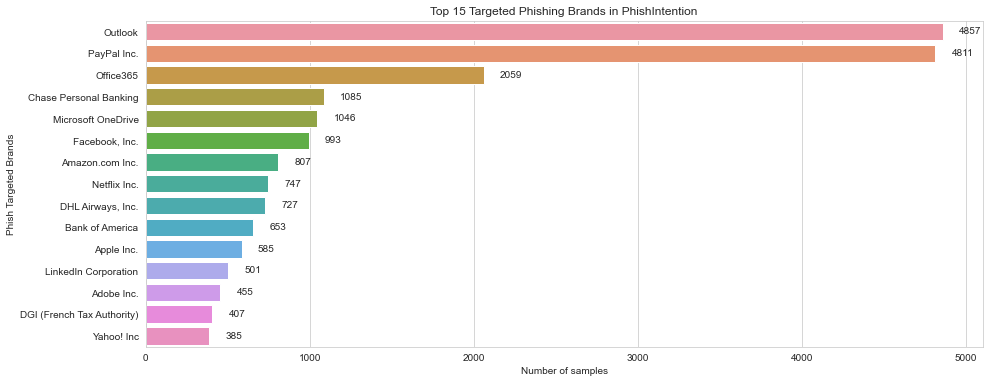

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

brands = phish_samples.brand.value_counts()[:15].index
values = phish_samples.brand.value_counts()[:15].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=brands, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Phish Targeted Brands')
plt.title("Top 15 Targeted Phishing Brands in PhishIntention")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

<hr></hr>

<a id='5' /> 
<h2>1.5 Detected Text Languages</h2>

In [11]:
trafilatura_langs_phish = phish_samples.trafilatura_text_language.value_counts()

# top 10 languages detected in trafilatura text
trafilatura_langs_phish[:10]

English               22698
French                 1747
German                  869
Tagalog                 596
Portuguese              548
Japanese                501
Spanish; Castilian      443
Dutch; Flemish          248
Russian                 222
Italian                 110
Name: trafilatura_text_language, dtype: int64

In [12]:
print('The total number of phishing languages (Trafilatura): ', len(trafilatura_langs_phish))

The total number of phishing languages (Trafilatura):  34


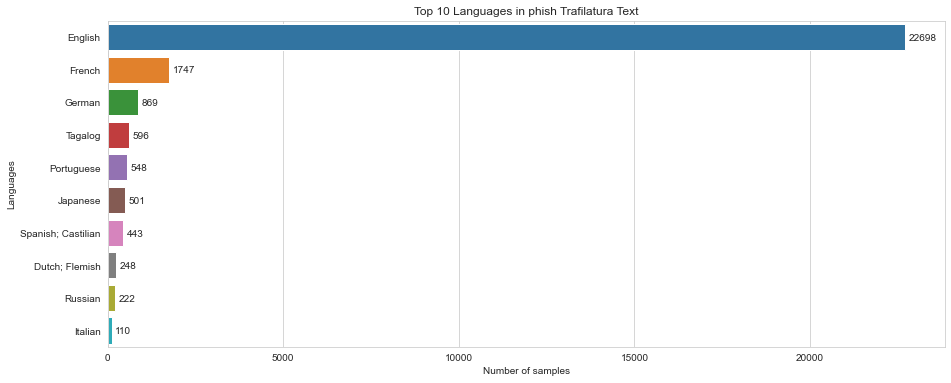

In [13]:
langs = trafilatura_langs_phish[:10].index
values = trafilatura_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish Trafilatura Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [14]:
BeautifulSoup_langs_phish = phish_samples.BeautifulSoup_text_language.value_counts()

# top 10 languages detected in BeautifulSoup text
BeautifulSoup_langs_phish[:10]

English               22870
French                 1719
German                  864
Tagalog                 645
Portuguese              548
Japanese                501
Spanish; Castilian      443
Dutch; Flemish          240
Russian                 221
Italian                  98
Name: BeautifulSoup_text_language, dtype: int64

In [15]:
print('The total number of phishing languages (BS): ', len(BeautifulSoup_langs_phish))

The total number of phishing languages (BS):  34


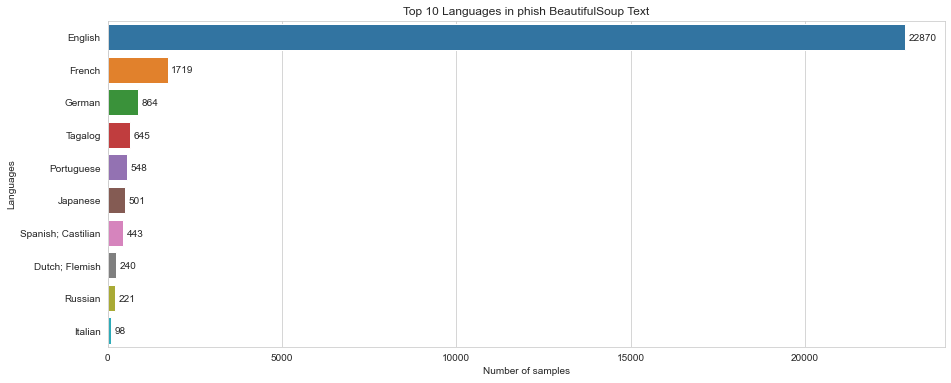

In [16]:
langs = BeautifulSoup_langs_phish[:10].index
values = BeautifulSoup_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish BeautifulSoup Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


In [17]:
html_langs_phish = phish_samples.html_text_language.value_counts()

# top 10 languages detected in html text
html_langs_phish[:10]

English               28473
French                  161
Catalan; Valencian      124
Japanese                 65
Somali                   46
Croatian                 39
Tagalog                  37
Danish                   37
Spanish; Castilian       30
Portuguese                8
Name: html_text_language, dtype: int64

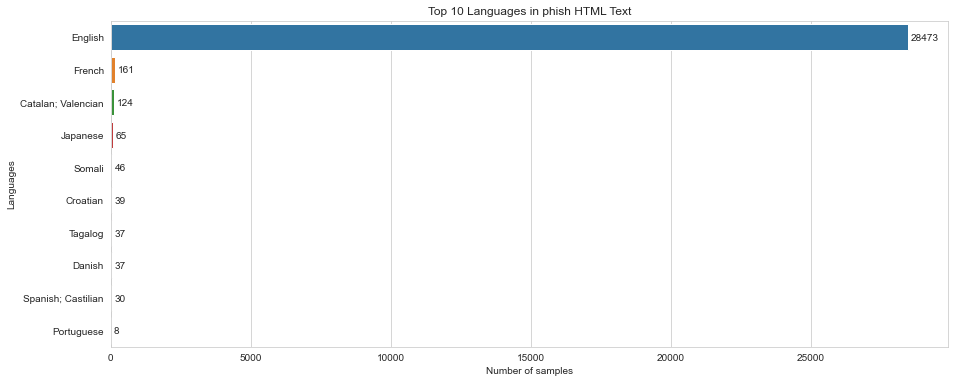

In [18]:
langs = html_langs_phish[:10].index
values = html_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish HTML Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


<hr></hr>

<a id='6' /> 
<h2>1.6 SSL Distribution</h2>

In [19]:
phish_samples.SSL.value_counts()

False    19745
True      9751
Name: SSL, dtype: int64

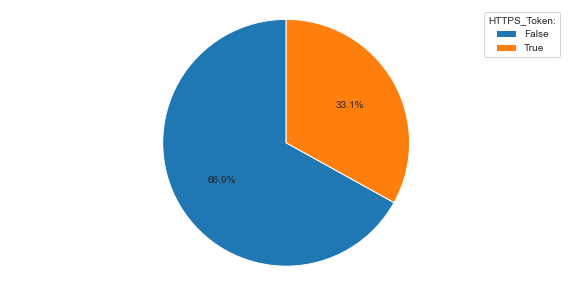

In [20]:
sizes = phish_samples.SSL.value_counts().values 
labels= phish_samples.SSL.value_counts().index 
fig=plt.figure(figsize=(10, 5))
plt.pie(sizes, startangle = 90, autopct = '%1.1f%%')
plt.legend(labels, title = 'HTTPS_Token:')
plt.axis('equal')

plt.show()

<hr></hr>

<a id='7' /> 
<h2>1.7 Top 10 TLD & Domains</h2>

In [21]:
phish_samples.Domain.value_counts()[:10]

shadetreetechnology     1749
000webhostapp            878
saluti24                 361
duilawyeryork            228
cu                       178
htmlcomponentservice     172
cosmoia                  169
justns                   150
brussel-airport          146
het-impp11               128
Name: Domain, dtype: int64

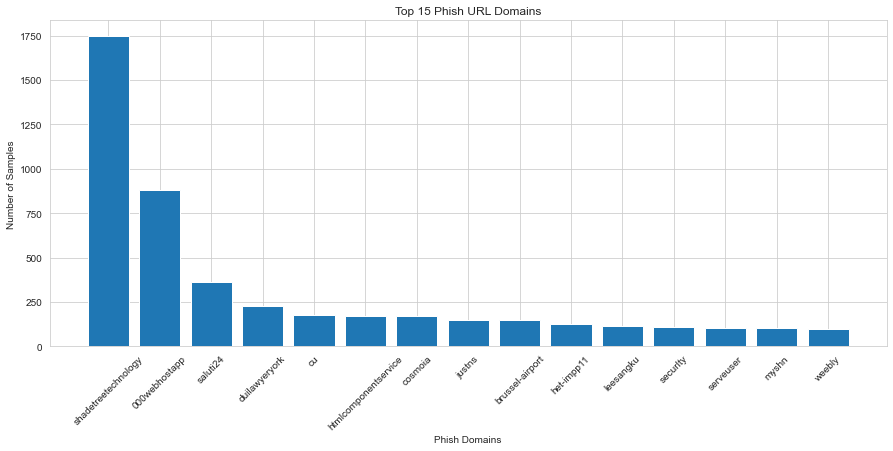

In [22]:
domains = phish_samples.Domain.value_counts()[:15].index
counts = phish_samples.Domain.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(domains, counts)

# Add labels and title
plt.xlabel("Phish Domains")
plt.ylabel("Number of Samples")
plt.title("Top 15 Phish URL Domains")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [23]:
phish_samples.TLD.value_counts()[:10]

com                 14138
ey.r.appspot.com     3822
ru                   1036
net                   805
org                   584
be                    353
com.br                342
com.au                291
top                   277
in                    249
Name: TLD, dtype: int64

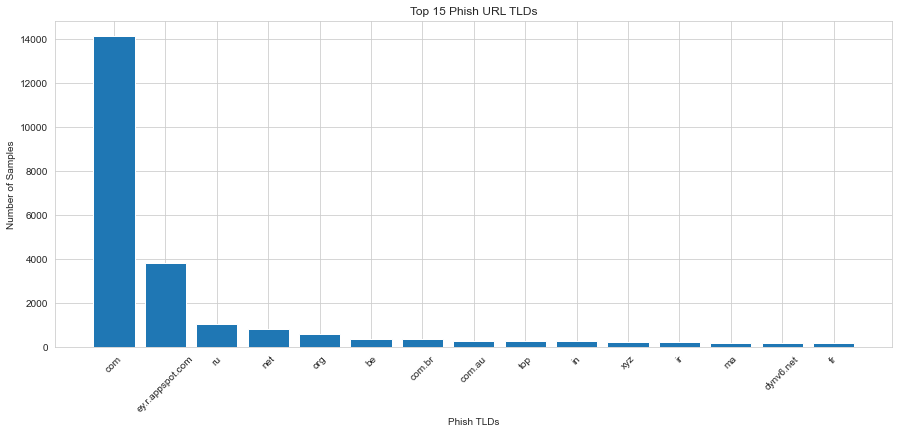

In [24]:
tlds = phish_samples.TLD.value_counts()[:15].index
counts = phish_samples.TLD.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(tlds, counts)

# Add labels and title
plt.xlabel("Phish TLDs")
plt.ylabel("Number of Samples")
plt.title("Top 15 Phish URL TLDs")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<hr></hr>

<a id='8' /> 
<h2>1.8 URL Length Stats</h2>

In [25]:
print('Phish URL average length:', round(phish_samples.URL.str.len().sum()/sum(phish_samples.URL.notnull()), 4))
print('Phish URL min length:', phish_samples.URL.str.len().min())
print('Phish URL max length:', phish_samples.URL.str.len().max())
print('Phish URL median length:', phish_samples.URL.str.len().median())

Phish URL average length: 84.195
Phish URL min length: 15
Phish URL max length: 1850
Phish URL median length: 61.0


<hr></hr>

<a id='9' /> 
<h2>1.9 Top 10 FLD & Subdomains</h2>

In [26]:
phish_samples.iloc[:, 4:9].head(10)

,URL,TLD,Domain,FLD,Subdomain
0,http://serv-acamai.com/1und1/de/index.php,com,serv-acamai,serv-acamai.com,None
1,http://www.mariagraziagiove.com/ibdg/phpmailer...,com,mariagraziagiove,mariagraziagiove.com,www
2,http://news.svnhforum.com/wp-content/plugins/l...,com,svnhforum,svnhforum.com,news
3,http://mariagraziagiove.com/ibdg/phpmailer/php...,com,mariagraziagiove,mariagraziagiove.com,None
4,http://czystek.net.pl/hilfe/blue,net.pl,czystek,czystek.net.pl,None
5,https://www.iwa-icr363.com/trading/web/email/,com,iwa-icr363,iwa-icr363.com,www
6,https://www.iwa-icr363.com/trading/web/email/i...,com,iwa-icr363,iwa-icr363.com,www
7,http://news.svnhforum.com/wp-content/plugins/l...,com,svnhforum,svnhforum.com,news
8,http://www.aislacontrol.com/modules/1nd/a,com,aislacontrol,aislacontrol.com,www
9,http://excellchuyensau.com/wp/1_1webmail/login...,com,excellchuyensau,excellchuyensau.com,None


In [27]:
print('the number of unique flds:', len(phish_samples.FLD.unique()))
phish_samples.FLD.value_counts()[:15]

the number of unique flds: 12695


shadetreetechnology.com     1749
000webhostapp.com            878
saluti24.ru                  361
duilawyeryork.com            228
cu.ma                        178
htmlcomponentservice.com     172
cosmoia.com                  169
justns.ru                    150
brussel-airport.be           146
het-impp11.com               128
leesangku.com                116
securlty.be                  109
serveuser.com                106
myshn.net                    104
weebly.com                    95
Name: FLD, dtype: int64

In [28]:
print('the number of unique subdomains:', len(phish_samples.Subdomain.unique()))
phish_samples.Subdomain.value_counts()[:15]

the number of unique subdomains: 7214


www                                                     3250
secureupdate.appleld.com                                 162
mail                                                     146
secure.runescape                                         112
rakuten.co.jp                                            104
security-jpmorganchase                                    97
microsottoffice365                                        82
storage                                                   81
wereldpas-recyclings-proces                               80
m                                                         78
chaseverification                                         71
www.secureupdate.appleld.com                              65
ofice365support                                           57
chase-authoririze                                         53
https.www.paypal.com.ttlart2012ttcysu.aylandirow.tmf      49
Name: Subdomain, dtype: int64

In [29]:
phish_samples.iloc[:, 4:9].describe()

,URL,TLD,Domain,FLD,Subdomain
count,29496,29193,29193,29193,15341
unique,25724,458,12571,12694,7213
top,http://animalwelfareinc.org/wp-content/themes/...,com,shadetreetechnology,shadetreetechnology.com,www
freq,9,14138,1749,1749,3250


<hr></hr>

<hr></hr>

<a id='legit' /> 
<center>
  <h2 id="legit-samples" style="color:red">2. Legit samples</h2>
</center>


<a id='11' /> 
<h2>2.1 Reading Legit parquet file</h2>

In [30]:
%%time
legit_samples = pd.read_parquet('PhishIntention_legit.parquet')

CPU times: total: 14.9 s
Wall time: 11.5 s


In [31]:
legit_samples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28449 entries, 29496 to 57944
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   dataset_name                 28449 non-null  object
 1   folder_name                  28449 non-null  object
 2   Class                        28449 non-null  object
 3   brand                        28449 non-null  object
 4   URL                          25023 non-null  object
 5   TLD                          25021 non-null  object
 6   Domain                       25021 non-null  object
 7   FLD                          25021 non-null  object
 8   Subdomain                    5777 non-null   object
 9   SSL                          28449 non-null  bool  
 10  image_path                   28449 non-null  object
 11  trafilatura_text             20475 non-null  object
 12  trafilatura_text_language    20254 non-null  object
 13  BeautifulSoup_text         

In [32]:
legit_samples.head(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
29496,PhishIntention,0-1.ir,legit,unknown,https://0-1.ir,ir,0-1,0-1.ir,None,True,E:\new benchmark datasets\phishintention\benig...,در راستای تکریم مشتریان ، این مجموعه اقدام به ...,Persian; Farsi,\n\n\n\n\nصفرویک - شرکت مهندسی صفرویک پرداز ، ...,Persian; Farsi,\n\n * [خانه](https://0-1.ir/)\n * صفرویک من...,\n\n\n\n\nصفرویک - شرکت مهندسی صفرویک پرداز ، ...,صفرویک - شرکت مهندسی صفرویک پرداز ، ارائه دهند...,"<html style=""margin-top: 0!important;""><head>\...",English
29497,PhishIntention,001farm.com,legit,unknown,None,None,None,None,None,False,E:\new benchmark datasets\phishintention\benig...,None,None,None,None,None,None,None,None,None
29498,PhishIntention,0101.co.jp,legit,unknown,https://0101.co.jp,co.jp,0101,0101.co.jp,None,True,E:\new benchmark datasets\phishintention\benig...,None,None,None,None,\n *[N.A]: North America\n *[\n ...,None,None,<html><head></head><body></body></html>,Welsh
29499,PhishIntention,01webdirectory.com,legit,unknown,https://01webdirectory.com,com,01webdirectory,01webdirectory.com,None,True,E:\new benchmark datasets\phishintention\benig...,01webdirectory Home\nToggle navigation\nSearch...,English,\n\n\n01Webdirectory.com - Web Directory & Res...,English,[ ![](siteimages/logo_home.jpg) ](https://www....,\n\n\n01Webdirectory.com - Web Directory & Res...,01Webdirectory.com - Web Directory & Resource ...,"<html><head>\n<link href=""/favicon.ico"" rel=""S...",English
29500,PhishIntention,0668.be,legit,unknown,https://0668.be,be,0668,0668.be,None,True,E:\new benchmark datasets\phishintention\benig...,"电白论坛\n-\n- 最后: 关于捍卫广东人民公平生存发展权益与待遇的建议 海阔天空6, 星...",None,\n\n\n\n\n\n电白论坛\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,None,\n\n### [登录或注册](login/)\n\n用户名或邮件地址:\n\n \...,\n\n\n\n\n\n电白论坛\n\n\n\n\n\n \n<!-- \nimg{ \nm...,电白论坛\n\n登录或注册\n\n用户名或邮件地址:\n\n您已经有一个帐户？\n\n没有账...,"<html class=""Public LoggedOut Sidebar Responsi...",English
29501,PhishIntention,0815.at,legit,unknown,None,None,None,None,None,False,E:\new benchmark datasets\phishintention\benig...,None,None,None,None,None,None,None,None,None
29502,PhishIntention,08nm.com,legit,unknown,https://08nm.com,com,08nm,08nm.com,None,True,E:\new benchmark datasets\phishintention\benig...,一步搞定\n只需一步，快速开始\n联系我们|Archiver|手机版|滚动|柠檬大学\n( ...,English,\n\n柠檬大学-伴我成长\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n设为首...,None,[设为首页](javascript:;)[收藏](http://www.08nm.com/)...,\n\n柠檬大学-伴我成长\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n设为首...,柠檬大学-伴我成长\n\n设为首页 收藏 排行 赚积分 土豪 打赏我们\nQQ群：27652...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",English
29503,PhishIntention,0db.co.kr,legit,unknown,None,None,None,None,None,False,E:\new benchmark datasets\phishintention\benig...,None,None,None,None,None,None,None,None,None
29504,PhishIntention,0zz0.com,legit,unknown,https://0zz0.com,com,0zz0,0zz0.com,None,True,E:\new benchmark datasets\phishintention\benig...,|\n||\nمع العملاق تضمن حماية خصوصية صورك و است...,Arabic,\n\n\n\n\n\n\n\n\nالعملاق لرفع و تحميل الصور\n...,Arabic,| | ![](template/images/spacer.gif) | ![](te...,\n\n\n\n\n\n\n\n\nالعملاق لرفع و تحميل الصور\n...,العملاق لرفع و تحميل الصور\n\nالرئيسية | الميز...,"<html prefix=""og: http://ogp.me/ns#""><head>\n<...",English
29505,PhishIntention,1-s.jp,legit,unknown,None,None,None,None,None,False,E:\new benchmark datasets\phishintention\benig...,None,None,None,None,None,None,None,None,None


In [33]:
legit_samples.tail(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
57935,PhishIntention,zante.today,legit,unknown,https://zante.today/,today,zante,zante.today,None,True,E:\new benchmark datasets\phishintention\misle...,"Time in Zakynthos:\n22:35:03\nThursday, Decemb...",English,\n\n\n\n\nZante.Today | Τα νέα τση Ζακύνθου σε...,English,Zakynthos ![Weather is Partly\ncloudy](//cdn.w...,\n \n \n \n \n ...,Zante.Today | Τα νέα τση Ζακύνθου σε ένα ιστολ...,"<!DOCTYPE html><html class=""html"" lang=""en""><h...",English
57936,PhishIntention,zdoroved.by,legit,unknown,https://zdoroved.by/,by,zdoroved,zdoroved.by,None,True,E:\new benchmark datasets\phishintention\misle...,Каждый из нас носит с собой огромный микромир....,Russian,\n\n\nГлавная - «Центр здорового питания»\n\n\...,Russian,__Close\n\n * [Главная](https://zdoroved.by/)...,\n\t\n\t\n\tГлавная - «Центр здорового питания...,Главная - «Центр здорового питания»\n\n<style>...,"<!DOCTYPE html><html lang=""ru-RU""><head>\n\t<m...",English
57937,PhishIntention,zeliflapom.tk,legit,unknown,http://zeliflapom.tk,tk,zeliflapom,zeliflapom.tk,None,False,E:\new benchmark datasets\phishintention\misle...,Gmail\nImages\nSign in\nRemove\nReport inappro...,English,GoogleGmailImagesSign in Remove Rep...,English,[Gmail](https://mail.google.com/mail/?tab=wm&o...,Google@-webkit-keyframes gb__a{0%{opacity:0}50...,Google\n\nGmail\nImages\nSign in\n\nRemove\nRe...,"<!DOCTYPE html><html itemscope="""" itemtype=""ht...",English
57938,PhishIntention,zencdn.com.eu.cas.ms,legit,unknown,https://www.afternic.com/forsale/zencdn.com?ut...,com,afternic,afternic.com,www,True,E:\new benchmark datasets\phishintention\misle...,"We serve cookies.\nWe use tools, such as cooki...",English,\n\n\n\n\n\n\n\nzencdn.com\n\n\n\n\nzencdn.com...,English,\n\n# zencdn.com\n\n## 您访问的域名正在出售！\n\n### 欲知价格...,\n\n\n@font-face {\n font-family: gd-sage;\n ...,zencdn.com\n\nzencdn.com\n\n您访问的域名正在出售！\n\n欲知价...,"<!DOCTYPE html><html lang=""en"" dir=""ltr""><head...",English
57939,PhishIntention,zetflix.to,legit,unknown,https://zetflix.to/,to,zetflix,zetflix.to,None,True,E:\new benchmark datasets\phishintention\misle...,ZETFLIX – фильмы и сериалы NETFLIX бесплатно\n...,Russian,\n\nZETFLIX – фильмы и сериалы NETFLIX\n\n\n\n...,Russian,[](/)\n\n * [Фильмы](/films)\n * [Сериалы](/...,\n\nZETFLIX – фильмы и сериалы NETFLIX\n\n\n\n...,ZETFLIX – фильмы и сериалы NETFLIX\n\nФильмы\n...,"<!DOCTYPE html><html xmlns=""//www.w3.org/1999/...",English
57940,PhishIntention,zevedaiou.com,legit,unknown,https://zevedaiou.com/,com,zevedaiou,zevedaiou.com,None,True,E:\new benchmark datasets\phishintention\misle...,"If this is your domain name, please visit this...",English,\n\n\nzevedaiou.com | Time To Live (TTL)\n\n\n...,English,[![ClouDNS.net: Free DNS hosting](https://www....,\n\t\t\n\t\t\n\t\t\n\t\t\t\t\n\t\tzevedaiou.co...,zevedaiou.com | Time To Live (TTL)\n\nzevedaio...,"<!DOCTYPE html><html lang=""en""><head>\n\t\t<me...",English
57941,PhishIntention,znotifications0.4.dev4.zfactory.tech,legit,unknown,https://znotifications0.4.dev4.zfactory.tech/,tech,zfactory,zfactory.tech,znotifications0.4.dev4,True,E:\new benchmark datasets\phishintention\misle...,One of the key terms of project management is ...,English,\n\n\n\n\n\n\n\n\n\n\n\n\n\nPM Notifications\n...,English,[PM Notification]() __\n\n * [__Home]()\n * ...,\n \n \n \n \n \n \n \...,PM Notifications\n\nPM Notification\n\nHome\nA...,"<html lang=""en""><head> \n <meta charset=""ut...",English
57942,PhishIntention,zod.wiki,legit,unknown,https://zod.wiki/,wiki,zod,zod.wiki,None,True,E:\new benchmark datasets\phishintention\misle...,解锁流媒体 以 Netflix 为例来简单介绍下 方案以 iptables dnsmasq ...,Catalan; Valencian,\n\n\n\n\nZod's Blog \n\n\n\n\n\n\n\n\n\n\n\n\...,Catalan; Valencian,[Zod's Blog ](https://zod.wiki/)\n\nZod 的 linu...,\n \n \n \

In [34]:
legit_samples.describe()

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,image_path,trafilatura_text,trafilatura_text_language,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
count,28449,28449,28449,28449,25023,25021,25021,25021,5777,28449,28449,20475,20254,20475,20282,21458,20474,20471,21458,21458
unique,1,28449,1,1,25016,615,23605,24660,911,2,28449,19398,53,19689,52,20370,19722,19666,20030,31
top,PhishIntention,0-1.ir,legit,unknown,https://www.formations-pedicure-en-continu.be/,com,google,azure.com,www,True,E:\new benchmark datasets\phishintention\benig...,Not Found Not Found HTTP Error 404. The reques...,English,Not Found\n\nNot Found\nHTTP Error 404. The re...,English,\n\n### Esdis Cloud\n\n# Domain for sale\n\nTh...,Not Found\n\nNot Found\nHTTP Error 404. The re...,Not Found\n\nNot Found\n\nHTTP Error 404. The ...,<html><head></head><body></body></html>,English
freq,28449,1,28449,28449,2,12863,130,56,4741,21683,1,146,12594,145,12634,37,145,146,947,20122


<hr></hr>

<a id='22' /> 
<h2>2.2 Missing Data</h2>

In [35]:
print('the number of missing HTML files (legit):', sum(legit_samples.full_html.isnull()))
print('the number of missing URLs (legit):', sum(legit_samples.URL.isnull()))
print('the number of missing images (legit):', sum(legit_samples.image_path.isnull()))

the number of missing HTML files (legit): 6991
the number of missing URLs (legit): 3426
the number of missing images (legit): 0


<hr></hr>

<a id='33' /> 
<h2>2.3 Average Text Length</h2>

In [36]:
print('the average legit HTML code text length:', round(legit_samples.full_html.str.len().sum() / sum(legit_samples.full_html.notnull()), 1))
print('the average legit trafilatura text length:', round((legit_samples.trafilatura_text.str.len().sum() / sum(legit_samples.trafilatura_text.notnull())),1))
print('the average legit BeautifulSoup text length:', round(legit_samples.BeautifulSoup_text.str.len().sum() / sum(legit_samples.BeautifulSoup_text.notnull()), 1))
print('the average legit html2text text length:', round(legit_samples.html2text_text.str.len().sum() / sum(legit_samples.html2text_text.notnull()), 1))
print('the average legit html_extract text length:', round(legit_samples.html_extract_text.str.len().sum() / sum(legit_samples.html_extract_text.notnull()), 1))
print('the average legit lxml_text text length:', round(legit_samples.lxml_text.str.len().sum() / sum(legit_samples.lxml_text.notnull()), 1))


the average legit HTML code text length: 136160.3
the average legit trafilatura text length: 2359.7
the average legit BeautifulSoup text length: 9025.3
the average legit html2text text length: 73608.3
the average legit html_extract text length: 7397.0
the average legit lxml_text text length: 30620.9


<hr></hr>

<a id='44' /> 
<h2>2.4 Legit Brand Distribution</h2>

In [37]:
#there are no legitimate brand data
legit_samples.brand.value_counts()

unknown    28449
Name: brand, dtype: int64

<hr></hr>

<a id='55' /> 
<h2>2.5 Detected Text Languages</h2>

In [38]:
trafilatura_langs_legit = legit_samples.trafilatura_text_language.value_counts()

# top 10 languages detected in trafilatura text
trafilatura_langs_legit[:10]

English               12594
Russian                1149
German                 1070
French                  734
Spanish; Castilian      699
Persian; Farsi          564
Italian                 410
Portuguese              398
Japanese                358
Polish                  248
Name: trafilatura_text_language, dtype: int64

In [39]:
print('The total number of legitimate languages (trafilatura): ', len(trafilatura_langs_legit))

The total number of legitimate languages (trafilatura):  53


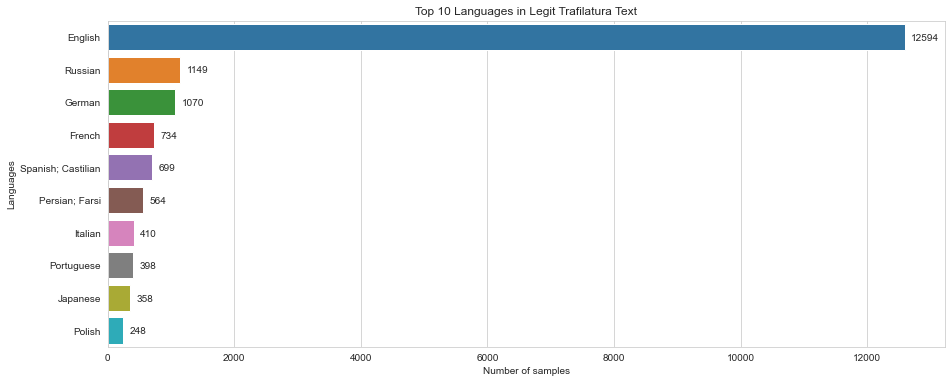

In [40]:
langs = trafilatura_langs_legit[:10].index
values = trafilatura_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit Trafilatura Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [41]:
BeautifulSoup_langs_legit = legit_samples.BeautifulSoup_text_language.value_counts()

# top 10 languages detected in BeautifulSoup text
BeautifulSoup_langs_legit[:10]

English               12634
Russian                1154
German                 1053
French                  720
Spanish; Castilian      710
Persian; Farsi          568
Italian                 408
Portuguese              393
Japanese                365
Polish                  247
Name: BeautifulSoup_text_language, dtype: int64

In [42]:
print('The total number of legitimate languages (BS): ', len(BeautifulSoup_langs_legit))

The total number of legitimate languages (BS):  52


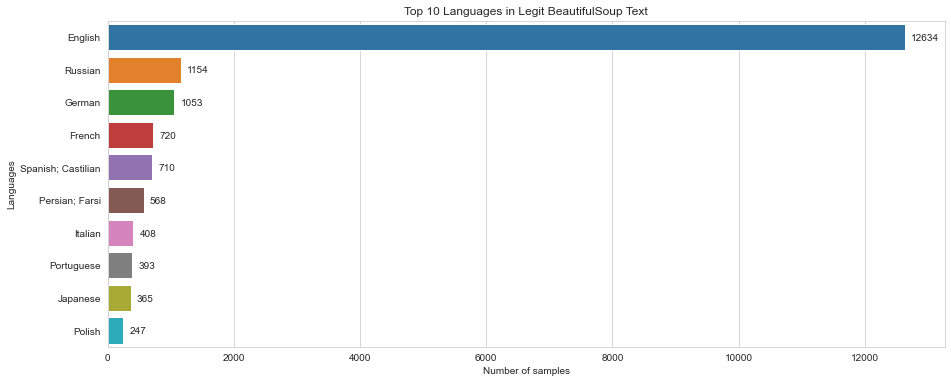

In [43]:
langs = BeautifulSoup_langs_legit[:10].index
values = BeautifulSoup_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit BeautifulSoup Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [44]:
html_langs_legit = legit_samples.html_text_language.value_counts()

# top 10 languages detected in html text
html_langs_legit[:10]

English                          20122
Welsh                              966
French                              91
Catalan; Valencian                  47
Italian                             30
Estonian                            26
Romanian; Moldavian; Moldovan       24
Spanish; Castilian                  22
German                              17
Russian                             16
Name: html_text_language, dtype: int64

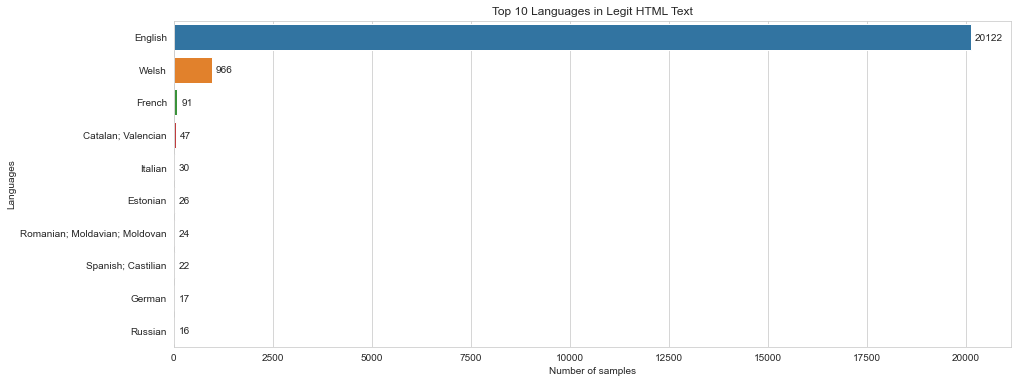

In [45]:
langs = html_langs_legit[:10].index
values = html_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit HTML Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


<hr></hr>

<a id='66' /> 
<h2>2.6 SSL Distribution</h2>

In [46]:
legit_samples.SSL.value_counts()

True     21683
False     6766
Name: SSL, dtype: int64

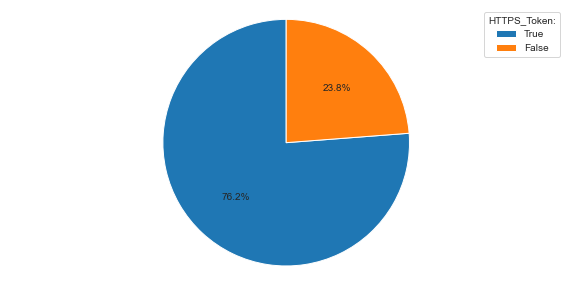

In [47]:
sizes = legit_samples.SSL.value_counts().values 
labels= legit_samples.SSL.value_counts().index 
fig=plt.figure(figsize=(10, 5))
plt.pie(sizes, startangle = 90, autopct = '%1.1f%%')
plt.legend(labels, title = 'HTTPS_Token:')
plt.axis('equal')

plt.show()

<hr></hr>

<a id='77' /> 
<h2>2.7 Top 10 TLD & Domains</h2>

In [48]:
legit_samples.Domain.value_counts()[:10]

google         130
azure           56
esdis           56
certsbridge     32
epimore         26
cuelgame        21
tripadvisor     20
homify          17
chrono24        14
autodesk        14
Name: Domain, dtype: int64

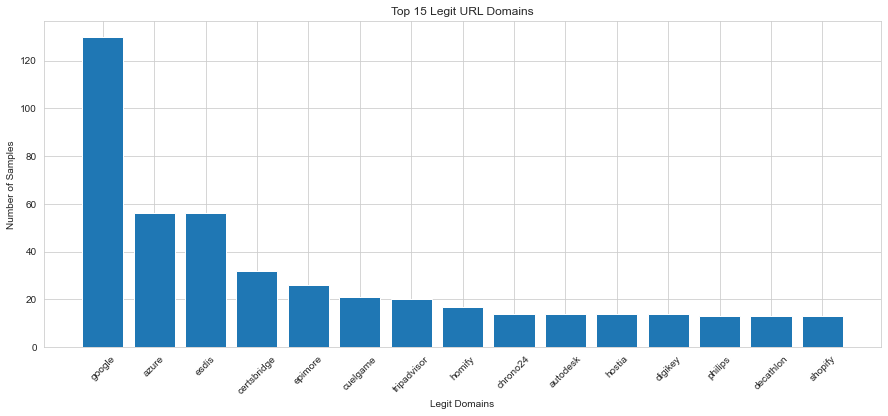

In [49]:
domains = legit_samples.Domain.value_counts()[:15].index
counts = legit_samples.Domain.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(domains, counts)

# Add labels and title
plt.xlabel("Legit Domains")
plt.ylabel("Number of Samples")
plt.title("Top 15 Legit URL Domains")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [50]:
legit_samples.TLD.value_counts()[:10]

com       12863
org        1155
net         943
ru          836
de          793
co.uk       460
it          376
fr          362
edu         258
com.br      242
Name: TLD, dtype: int64

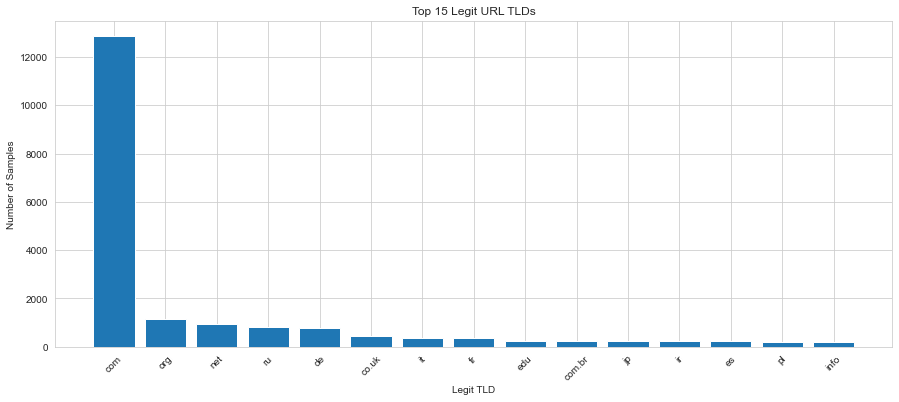

In [51]:
tlds = legit_samples.TLD.value_counts()[:15].index
counts = legit_samples.TLD.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(tlds, counts)

# Add labels and title
plt.xlabel("Legit TLD")
plt.ylabel("Number of Samples")
plt.title("Top 15 Legit URL TLDs")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<hr></hr>

<a id='88' /> 
<h2>2.8 URL Length Stats</h2>

In [52]:
print('Legit URL average length:', round(legit_samples.URL.str.len().sum()/sum(legit_samples.URL.notnull()), 4))
print('Legit URL min length:', legit_samples.URL.str.len().min())
print('Legit URL max length:', legit_samples.URL.str.len().max())
print('Legit URL median length:', legit_samples.URL.str.len().median())

Legit URL average length: 23.4934
Legit URL min length: 11.0
Legit URL max length: 927.0
Legit URL median length: 22.0


<hr></hr>

<a id='99' /> 
<h2>2.9 Top 10 FLD & Subdomains</h2>

In [53]:
legit_samples.iloc[:, 4:9].head(10)

,URL,TLD,Domain,FLD,Subdomain
29496,https://0-1.ir,ir,0-1,0-1.ir,None
29497,None,None,None,None,None
29498,https://0101.co.jp,co.jp,0101,0101.co.jp,None
29499,https://01webdirectory.com,com,01webdirectory,01webdirectory.com,None
29500,https://0668.be,be,0668,0668.be,None
29501,None,None,None,None,None
29502,https://08nm.com,com,08nm,08nm.com,None
29503,None,None,None,None,None
29504,https://0zz0.com,com,0zz0,0zz0.com,None
29505,None,None,None,None,None


In [54]:
print('the number of unique fld:', len(legit_samples.FLD.unique()))
legit_samples.FLD.value_counts()[:15]

the number of unique fld: 24661


azure.com           56
esdis.es            42
certsbridge.com     32
epimore.com         26
cuelgame.net        21
hostia.online       14
esdis.cloud         14
dsmatilla.com       13
zasca.online        10
ontraport.net        8
sbsllanes.com        8
cybake.com           7
inglesllanes.com     7
godaddy.com          6
docuload.vip         6
Name: FLD, dtype: int64

In [55]:
print('the number of unique subdomains:', len(legit_samples.Subdomain.unique()))
legit_samples.Subdomain.value_counts()[:15]

the number of unique subdomains: 912


www             4741
en                19
mail              13
google             6
sso                6
com.cn             6
shop               6
m                  6
live               5
autodiscover       5
facebook           5
login              4
g                  4
blog               4
test               4
Name: Subdomain, dtype: int64

In [56]:
legit_samples.iloc[:, 4:9].describe()

,URL,TLD,Domain,FLD,Subdomain
count,25023,25021,25021,25021,5777
unique,25016,615,23605,24660,911
top,https://www.formations-pedicure-en-continu.be/,com,google,azure.com,www
freq,2,12863,130,56,4741
